# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from datetime import datetime
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "../data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

627

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Create your url for the api
url = "https://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{url}&appid={weather_api_key}&units={units}&q="

set_num = 1
rec_num = 1

#Create lists
cities_found = []
lat = []
lng = []
maxtemp = []
humidity = []
cloudiness = []
wind_speed = []
country = []
date = []

for i, city in enumerate(cities):
    if(i%50==0 and i>=50):
        set_num +=1
        rec_num = 1
    try:
        response = requests.get(query_url + city).json()
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        maxtemp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        cloudiness.append(response["clouds"]["all"])
        wind_speed.append(response["wind"]["speed"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        cities_found.append(city)
        print("Processing Record " + str(rec_num) + " of Set " + str(set_num) + " | " + city)
        rec_num = rec_num + 1
    except:
        print(f"City not found. Skipping...")

time.sleep(.5)

Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | cherskiy
Processing Record 3 of Set 1 | rio gallegos
Processing Record 4 of Set 1 | bengkulu
Processing Record 5 of Set 1 | sinjai
Processing Record 6 of Set 1 | qaanaaq
Processing Record 7 of Set 1 | coquimbo
Processing Record 8 of Set 1 | saint-philippe
Processing Record 9 of Set 1 | west lafayette
Processing Record 10 of Set 1 | leningradskiy
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | san patricio
Processing Record 13 of Set 1 | namatanai
Processing Record 14 of Set 1 | punta arenas
Processing Record 15 of Set 1 | lorengau
Processing Record 16 of Set 1 | ushuaia
Processing Record 17 of Set 1 | torbay
Processing Record 18 of Set 1 | kapaa
Processing Record 19 of Set 1 | tuktoyaktuk
City not found. Skipping...
Processing Record 20 of Set 1 | salalah
Processing Record 21 of Set 1 | butaritari
Processing Record 22 of Set 1 | barrow
Processing Record 23 of Set 1 | leua
Processing Record 24 

Processing Record 6 of Set 5 | airai
Processing Record 7 of Set 5 | batagay-alyta
Processing Record 8 of Set 5 | arkhipo-osipovka
City not found. Skipping...
City not found. Skipping...
Processing Record 9 of Set 5 | hovd
Processing Record 10 of Set 5 | longhua
Processing Record 11 of Set 5 | mana
Processing Record 12 of Set 5 | moche
City not found. Skipping...
Processing Record 13 of Set 5 | padang
Processing Record 14 of Set 5 | provideniya
Processing Record 15 of Set 5 | dunedin
Processing Record 16 of Set 5 | new norfolk
Processing Record 17 of Set 5 | puerto ayacucho
Processing Record 18 of Set 5 | cardenas
Processing Record 19 of Set 5 | hammond
Processing Record 20 of Set 5 | porterville
Processing Record 21 of Set 5 | zonguldak
Processing Record 22 of Set 5 | quatre cocos
City not found. Skipping...
Processing Record 23 of Set 5 | gamba
Processing Record 24 of Set 5 | upernavik
Processing Record 25 of Set 5 | tabuk
Processing Record 26 of Set 5 | nikolskoye
Processing Record 2

Processing Record 14 of Set 9 | clyde river
Processing Record 15 of Set 9 | mao
Processing Record 16 of Set 9 | pisco
Processing Record 17 of Set 9 | martapura
Processing Record 18 of Set 9 | sanchor
Processing Record 19 of Set 9 | acapulco
Processing Record 20 of Set 9 | anaconda
Processing Record 21 of Set 9 | buala
Processing Record 22 of Set 9 | lichinga
Processing Record 23 of Set 9 | amapa
Processing Record 24 of Set 9 | nome
City not found. Skipping...
Processing Record 25 of Set 9 | bunda
Processing Record 26 of Set 9 | fukue
Processing Record 27 of Set 9 | changji
Processing Record 28 of Set 9 | robertsport
City not found. Skipping...
Processing Record 29 of Set 9 | kainantu
Processing Record 30 of Set 9 | dali
Processing Record 31 of Set 9 | saint-francois
Processing Record 32 of Set 9 | shellbrook
Processing Record 33 of Set 9 | kruisfontein
Processing Record 34 of Set 9 | beloha
Processing Record 35 of Set 9 | pandan
Processing Record 36 of Set 9 | conde
Processing Record 3

Processing Record 15 of Set 13 | bekhtery
Processing Record 16 of Set 13 | imbituba
Processing Record 17 of Set 13 | aksarka
Processing Record 18 of Set 13 | geraldton
City not found. Skipping...
Processing Record 19 of Set 13 | dhrangadhra
Processing Record 20 of Set 13 | dolores
Processing Record 21 of Set 13 | nemuro
Processing Record 22 of Set 13 | cururupu
Processing Record 23 of Set 13 | eureka
Processing Record 24 of Set 13 | terra santa
City not found. Skipping...


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
# Creating a dataframe with the weather info from the API
weather_df = pd.DataFrame({"City": cities_found,
                          "Lat": lat,
                          "Lng": lng,
                          "Max Temp": maxtemp,
                          "Humidity": humidity,
                          "Cloudiness": cloudiness,
                          "Wind Speed": wind_speed,
                          "Country": country,
                          "Date": date})
weather_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,46.47,93,100,2.26,NZ,1661546023
1,cherskiy,68.7500,161.3000,40.51,79,100,4.36,RU,1661546024
2,rio gallegos,-51.6226,-69.2181,39.25,45,20,31.07,AR,1661546024
3,bengkulu,-3.8004,102.2655,74.35,91,100,4.29,ID,1661546024
4,sinjai,-5.1241,120.2530,75.67,90,91,2.91,ID,1661546025


In [6]:
# Export to a csv file
weather_df.to_csv("../data/weather.csv", index = False)
weather_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,mataura,-46.1927,168.8643,46.47,93,100,2.26,NZ,1661546023
1,cherskiy,68.7500,161.3000,40.51,79,100,4.36,RU,1661546024
2,rio gallegos,-51.6226,-69.2181,39.25,45,20,31.07,AR,1661546024
3,bengkulu,-3.8004,102.2655,74.35,91,100,4.29,ID,1661546024
4,sinjai,-5.1241,120.2530,75.67,90,91,2.91,ID,1661546025
...,...,...,...,...,...,...,...,...,...
561,dolores,-36.3132,-57.6792,60.40,79,12,10.04,AR,1661546320
562,nemuro,43.3236,145.5750,62.94,96,100,10.11,JP,1661546321
563,cururupu,-1.8283,-44.8683,77.05,79,62,3.91,BR,1661546306
564,eureka,40.8021,-124.1637,64.26,88,51,5.01,US,1661546322


In [7]:
# Look at statisical data for our weather dataframe
weather_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,566.000000,566.000000,566.000000,566.000000,566.000000,566.000000,5.660000e+02
mean,18.020078,21.692641,69.429700,71.560071,56.487633,7.687650,1.661546e+09
std,32.567413,91.568661,14.360018,20.343748,38.285500,5.155355,1.115607e+02
min,-54.800000,-179.166700,31.930000,11.000000,0.000000,0.000000,1.661545e+09
25%,-8.138275,-58.025150,60.332500,64.000000,20.000000,3.800000,1.661546e+09
50%,21.187850,30.726450,72.580000,76.000000,65.500000,6.720000,1.661546e+09
75%,42.876425,103.624525,79.430000,87.000000,97.000000,10.360000,1.661546e+09
max,78.218600,178.416700,102.760000,100.000000,100.000000,33.380000,1.661546e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
# There are not any city over 100% since the max humidity in the table above is 100 so this step is going to be skipped.

In [9]:
#  Get the indices of cities that have humidity over 100%.

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [11]:
# Format to get the current date from the weather dataframe
weatherdate = weather_df["Date"].max()
todaysdate = datetime.utcfromtimestamp(weatherdate).strftime("%m/%d/%y")

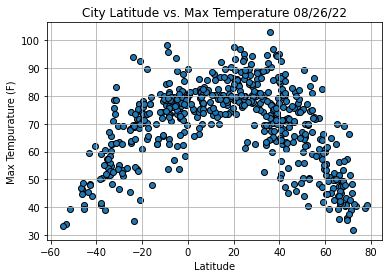

In [12]:
# Create a scatterplot for Lat vs. Max Temp
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature {todaysdate}")
plt.xlabel("Latitude")
plt.ylabel("Max Tempurature (F)")
plt.grid()

#Save scatterplot as a png
plt.savefig("../Images/City Latitude vs. Max Temperature.png")

plt.show()

Latitude Vs Temperature Analysis

The scatterplot above shows the latitude of each city and the max temperature for that city. It shows that the closer you are to the equator (Latitude 0) the higher the max temperature and the further away you are from the equator the lower the max temperature.

## Latitude vs. Humidity Plot

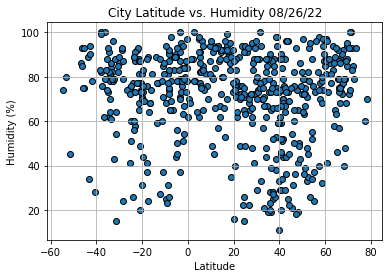

In [13]:
# Create a scatterplot for Lat vs. Humidity
plt.scatter(weather_df["Lat"], weather_df["Humidity"], edgecolor="black")
plt.title(f"City Latitude vs. Humidity {todaysdate}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

#Save scatterplot as a png
plt.savefig("../Images/City Latitude vs. Humidity.png")

plt.show()

Latitude vs. Humidity Analysis

The scatterplot above shows the latitude vs humidity. There is no direct correlation between latitude and humidity since the humidity percentage is all over the place.

## Latitude vs. Cloudiness Plot

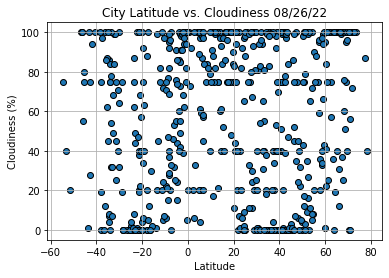

In [14]:
# Create a scatterplot for Lat vs. Cloudiness
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], edgecolor="black")
plt.title(f"City Latitude vs. Cloudiness {todaysdate}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

#Save scatterplot as a png
plt.savefig("../Images/City Latitude vs. Cloudiness.png")

plt.show()

Latitude vs Cloudiness Analysis

The scatterplot show the city's latitude vs. the city's cloudiness. There is no correlation between between cloudiness and latitude but there is a heavy bias towards 100% and 0% cloudiness.

## Latitude vs. Wind Speed Plot

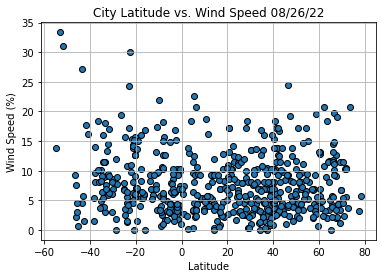

In [15]:
# Create a scatterplot for Lat vs. Wind Speed
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], edgecolor="black")
plt.title(f"City Latitude vs. Wind Speed {todaysdate}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%)")
plt.grid()

#Save scatterplot as a png
plt.savefig("../Images/City Latitude vs. Wind Speed.png")

plt.show()

Latitude vs Wind Speed Analysis

The scatterplot above show the city's latitude vs the wind speed. There is no correlation between latitude and wind speed.

## Linear Regression

In [16]:
# Create new dataframes for the northern and southern hemispheres
northern_df = weather_df.loc[weather_df["Lat"] >= 0]
southern_df = weather_df.loc[weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.696691812263035


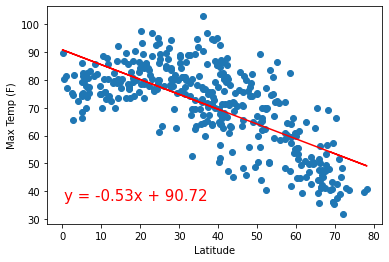

In [17]:
# Create a linear regression for max temp vs lat for the northern hemisphere and save the figure.
x_values = northern_df["Lat"]
y_values = northern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(.5,37),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Northern Hemisphere - Lat vs Max Temp.png")
plt.show()

There is a negative correlation between latitude and max temperatures for the northern hemisphere meaning that the further you get away from latitude 0 (equator) the temperatures go down.

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.6966647405960551


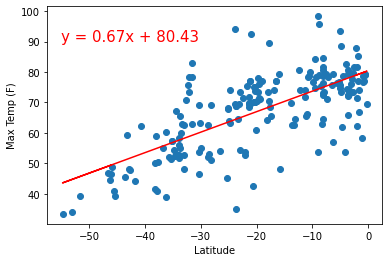

In [18]:
# Create a linear regression for max temp vs lat for the southern hemisphere and save the figure.
x_values = southern_df["Lat"]
y_values = southern_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-55,90),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Max Temp (F)")
plt.savefig("../Images/Southern Hemisphere - Lat vs Max Temp.png")
plt.show()

There is fairly strong positive correlation between latitude and max tempertures for the southern hemisphere meaning the closer you get to latitude 0 (equator) the higher the temperatures will be.

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.06550061047339045


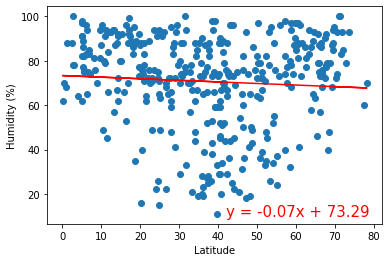

In [22]:
# Create a linear regression for humidity vs lat for the northern hemisphere and save the figure.
x_values = northern_df["Lat"]
y_values = northern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(42,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Northern Hemisphere - Lat vs Humidity.png")
plt.show()

There is no correlation between latitude and humidity in the northern hemisphere.

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: -0.0406685233732528


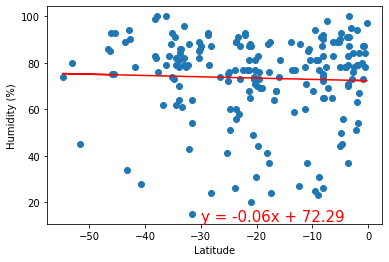

In [28]:
# Create a linear regression for humidity vs lat for the southern hemisphere and save the figure.
x_values = southern_df["Lat"]
y_values = southern_df["Humidity"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.savefig("../Images/Southern Hemisphere - Lat vs Humidity.png")
plt.show()

There is no correlation between latitude and humidity in the southern hemisphere.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.024338992220031445


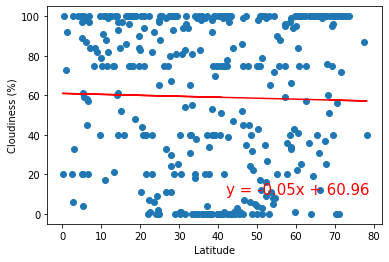

In [29]:
# Create a linear regression for cloudiness vs lat for the northern hemisphere and save the figure.
x_values = northern_df["Lat"]
y_values = northern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(42,10),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Northern Hemisphere - Lat vs Cloudiness.png")
plt.show()

There is no correlation between latitude and cloudiness in the northern hemisphere.

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.10016909159231947


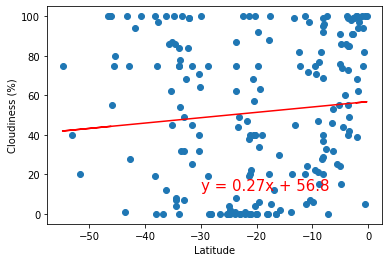

In [30]:
# Create a linear regression for cloudiness vs lat for the southern hemisphere and save the figure.
x_values = southern_df["Lat"]
y_values = southern_df["Cloudiness"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-30,12),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.savefig("../Images/Southern Hemisphere - Lat vs Cloudiness.png")
plt.show()

There is a slight positive correlation between latitude and cloudiness in the southern hemisphere.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.04883604277275661


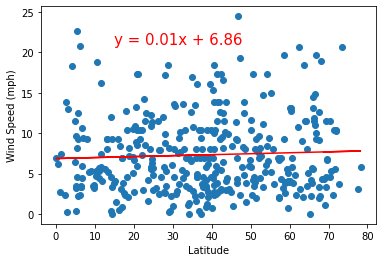

In [34]:
# Create a linear regression for wind speed vs lat for the northern hemisphere and save the figure.
x_values = northern_df["Lat"]
y_values = northern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(15,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Northern Hemisphere - Lat vs Wind Speed.png")
plt.show()

There is no correlation between latitude and wind speed in the northern hemisphere.

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.24454428755563976


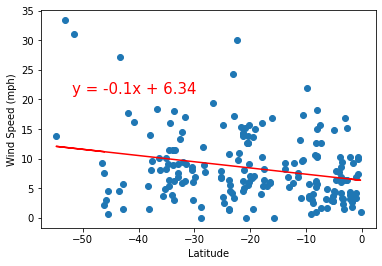

In [37]:
# Create a linear regression for wind speed vs lat for the southern hemisphere and save the figure.
x_values = southern_df["Lat"]
y_values = southern_df["Wind Speed"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
print(f"The r-value is: {rvalue}")
plt.annotate(line_eq,(-52,21),fontsize=15,color="red")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.savefig("../Images/Southern Hemisphere - Lat vs Wind Speed.png")
plt.show()

There is no correlation between latitude and wind speed in the southern hemisphere.

#### Data Analysis

1. Max tempertures are higher at the equator but that is where the sun is closest to teh earth and that is shown by both linear regression models and the latitude scatterplot.
2. There was a slight positive correlation with cloudiness and the south which is probably due to it being spring and rain is tytpically higher in that season.
3. Other than the first two there is no relationship between the latitude and anything else. One location is not going to have more humidity or have higher wind speeds based on latitude. 